# Abalone Age Prediction - Modeling

In this notebook, we build a machine learning model to predict the age of an Abalone (number of rings).

**Approach:**
- Use a simple linear regression model as baseline
- Track experiments with MLflow for reproducibility
- Evaluate model performance using appropriate metrics

## 1. Setup and Imports


In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import mlflow
import mlflow.sklearn

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Load and Prepare Data


In [12]:
# Load the dataset
df = pd.read_csv("../data/abalone.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (4177, 9)

First few rows:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# Encode categorical variable (Sex)
label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])

print("Sex encoding:")
for i, sex in enumerate(label_encoder.classes_):
    print(f"  {sex} -> {i}")


Sex encoding:
  F -> 0
  I -> 1
  M -> 2


In [14]:
# Prepare features (X) and target (y)
feature_columns = ['Sex_encoded', 'Length', 'Diameter', 'Height', 
                   'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

X = df[feature_columns]
y = df['Rings']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {feature_columns}")


Features shape: (4177, 8)
Target shape: (4177,)

Feature columns: ['Sex_encoded', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [15]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3341
Test set size: 836


## 3. Train Model with MLflow Tracking


In [16]:
# Set MLflow experiment name
mlflow.set_experiment("abalone_age_prediction")

# Start MLflow run
with mlflow.start_run(run_name="linear_regression_baseline") as run:
    
    # Train the model
    print("Training Linear Regression model...")
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Log parameters
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("features", feature_columns)
    mlflow.log_param("n_features", len(feature_columns))
    mlflow.log_param("train_size", X_train.shape[0])
    mlflow.log_param("test_size", X_test.shape[0])
    
    # Log metrics
    mlflow.log_metric("train_rmse", train_rmse)
    mlflow.log_metric("test_rmse", test_rmse)
    mlflow.log_metric("train_mae", train_mae)
    mlflow.log_metric("test_mae", test_mae)
    mlflow.log_metric("train_r2", train_r2)
    mlflow.log_metric("test_r2", test_r2)
    
    # Log model
    mlflow.sklearn.log_model(model, "model")
    
    # Print results
    print("\n" + "="*60)
    print("MODEL PERFORMANCE")
    print("="*60)
    print(f"Training Set:")
    print(f"  RMSE: {train_rmse:.4f}")
    print(f"  MAE:  {train_mae:.4f}")
    print(f"  R²:   {train_r2:.4f}")
    print(f"\nTest Set:")
    print(f"  RMSE: {test_rmse:.4f}")
    print(f"  MAE:  {test_mae:.4f}")
    print(f"  R²:   {test_r2:.4f}")
    print("="*60)
    
    run_id = run.info.run_id
    print(f"\nMLflow Run ID: {run_id}")


2025/10/23 11:00:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training Linear Regression model...


2025/10/23 11:00:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/23 11:00:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MODEL PERFORMANCE
Training Set:
  RMSE: 2.2067
  MAE:  1.6037
  R²:   0.5265

Test Set:
  RMSE: 2.2500
  MAE:  1.6306
  R²:   0.5323

MLflow Run ID: f556cbd9dc9146928ac09d84e68a2782


## 4. Model Analysis


Feature Importance (Coefficients):
          Feature  Coefficient
5  Shucked weight   -20.681025
2        Diameter    13.597938
3          Height    11.448400
4    Whole weight     9.157396
6  Viscera weight    -8.752822
7    Shell weight     8.648475
1          Length    -1.539459
0     Sex_encoded     0.084190


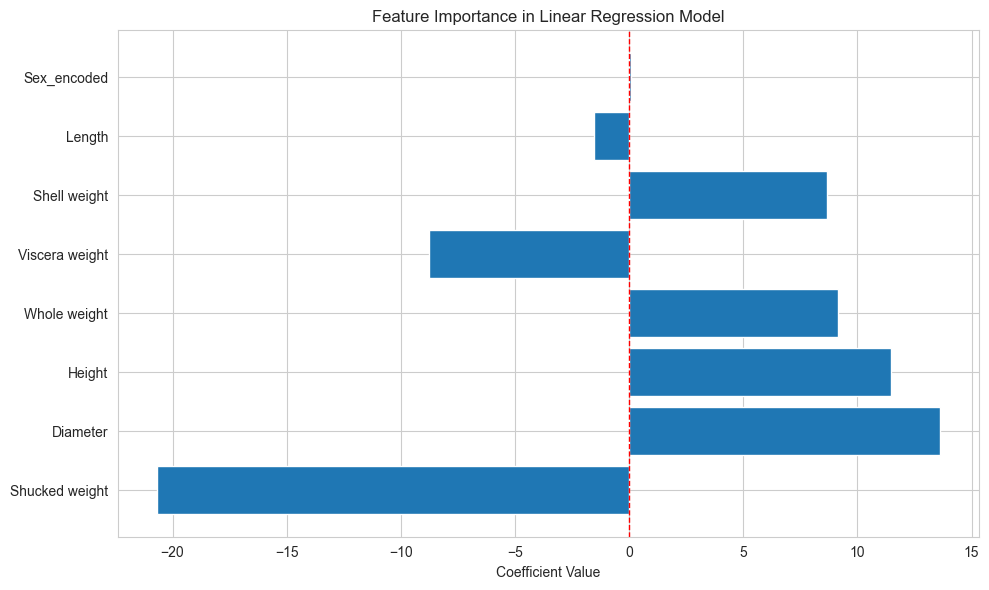

In [17]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Importance (Coefficients):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


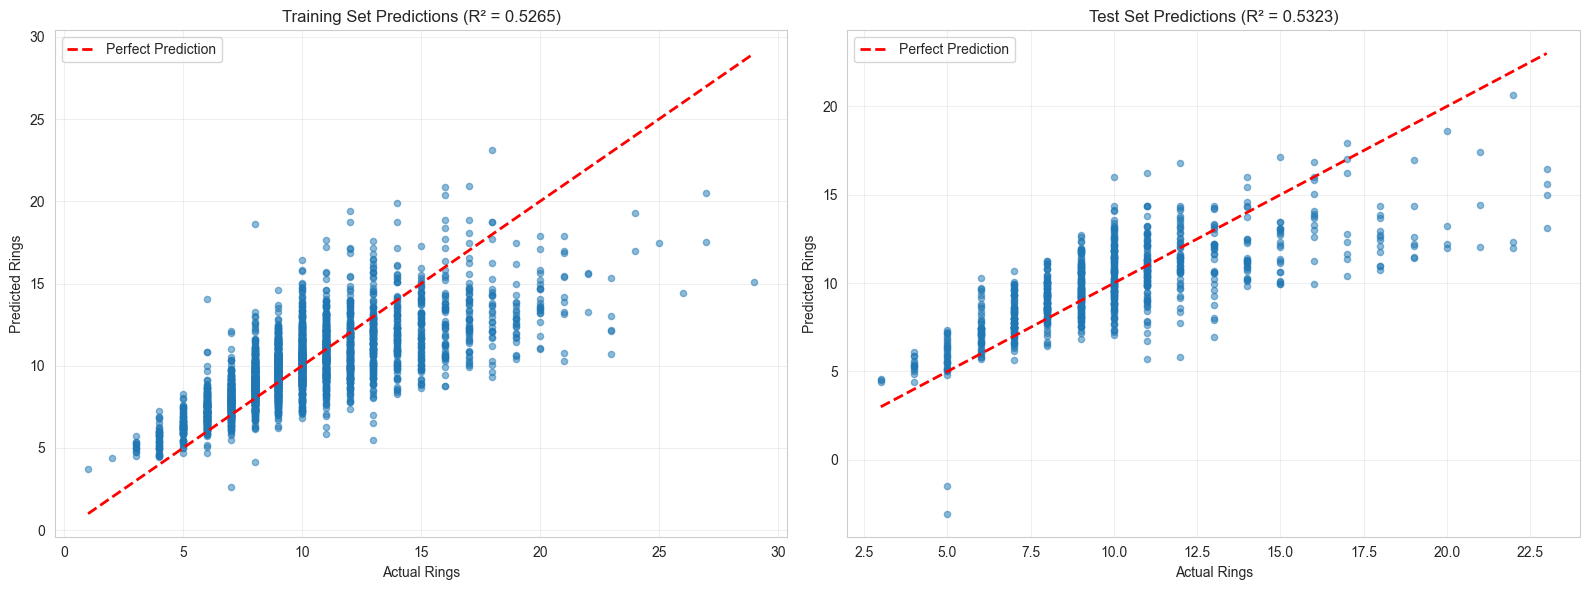

In [18]:
# Prediction vs Actual plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Rings')
axes[0].set_ylabel('Predicted Rings')
axes[0].set_title(f'Training Set Predictions (R² = {train_r2:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Rings')
axes[1].set_ylabel('Predicted Rings')
axes[1].set_title(f'Test Set Predictions (R² = {test_r2:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


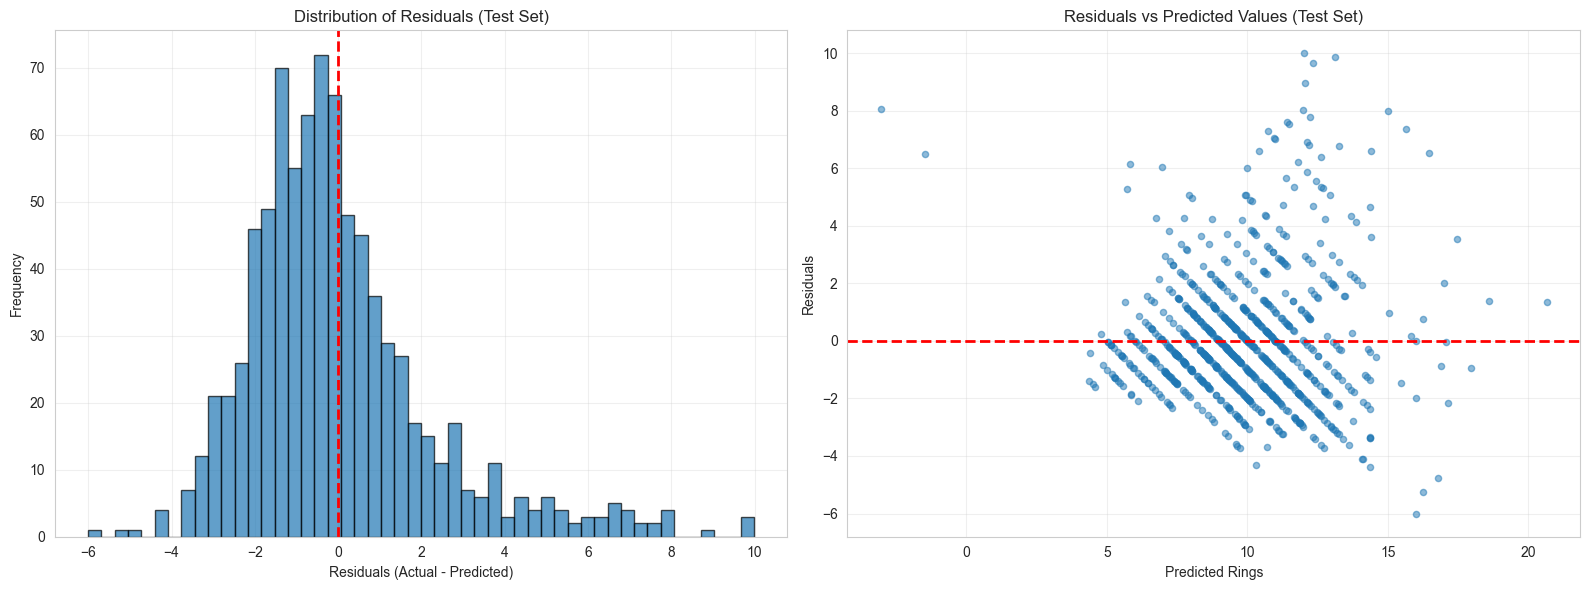

In [19]:
# Residual analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuals distribution
axes[0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals (Test Set)')
axes[0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=20)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Rings')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values (Test Set)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Random Forest Regression


In [20]:
# Train Random Forest model with MLflow tracking
with mlflow.start_run(run_name="random_forest_baseline") as run:
    
    # Train the model
    print("Training Random Forest model...")
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    
    # Calculate metrics
    train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
    train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
    test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
    train_r2_rf = r2_score(y_train, y_train_pred_rf)
    test_r2_rf = r2_score(y_test, y_test_pred_rf)
    
    # Log parameters
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 20)
    mlflow.log_param("min_samples_split", 5)
    mlflow.log_param("min_samples_leaf", 2)
    mlflow.log_param("features", feature_columns)
    mlflow.log_param("n_features", len(feature_columns))
    mlflow.log_param("train_size", X_train.shape[0])
    mlflow.log_param("test_size", X_test.shape[0])
    
    # Log metrics
    mlflow.log_metric("train_rmse", train_rmse_rf)
    mlflow.log_metric("test_rmse", test_rmse_rf)
    mlflow.log_metric("train_mae", train_mae_rf)
    mlflow.log_metric("test_mae", test_mae_rf)
    mlflow.log_metric("train_r2", train_r2_rf)
    mlflow.log_metric("test_r2", test_r2_rf)
    
    # Log model
    mlflow.sklearn.log_model(rf_model, "model")
    
    # Print results
    print("\n" + "="*60)
    print("RANDOM FOREST MODEL PERFORMANCE")
    print("="*60)
    print(f"Training Set:")
    print(f"  RMSE: {train_rmse_rf:.4f}")
    print(f"  MAE:  {train_mae_rf:.4f}")
    print(f"  R²:   {train_r2_rf:.4f}")
    print(f"\nTest Set:")
    print(f"  RMSE: {test_rmse_rf:.4f}")
    print(f"  MAE:  {test_mae_rf:.4f}")
    print(f"  R²:   {test_r2_rf:.4f}")
    print("="*60)
    
    rf_run_id = run.info.run_id
    print(f"\nMLflow Run ID: {rf_run_id}")


2025/10/23 11:00:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training Random Forest model...


2025/10/23 11:00:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/23 11:00:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



RANDOM FOREST MODEL PERFORMANCE
Training Set:
  RMSE: 1.0783
  MAE:  0.7343
  R²:   0.8869

Test Set:
  RMSE: 2.2386
  MAE:  1.5718
  R²:   0.5371

MLflow Run ID: defbcdbb86e244738992b3037093ceb8


Random Forest Feature Importance:
          Feature  Importance
7    Shell weight    0.529652
5  Shucked weight    0.167986
4    Whole weight    0.076939
6  Viscera weight    0.060465
3          Height    0.051295
2        Diameter    0.048406
1          Length    0.044035
0     Sex_encoded    0.021222


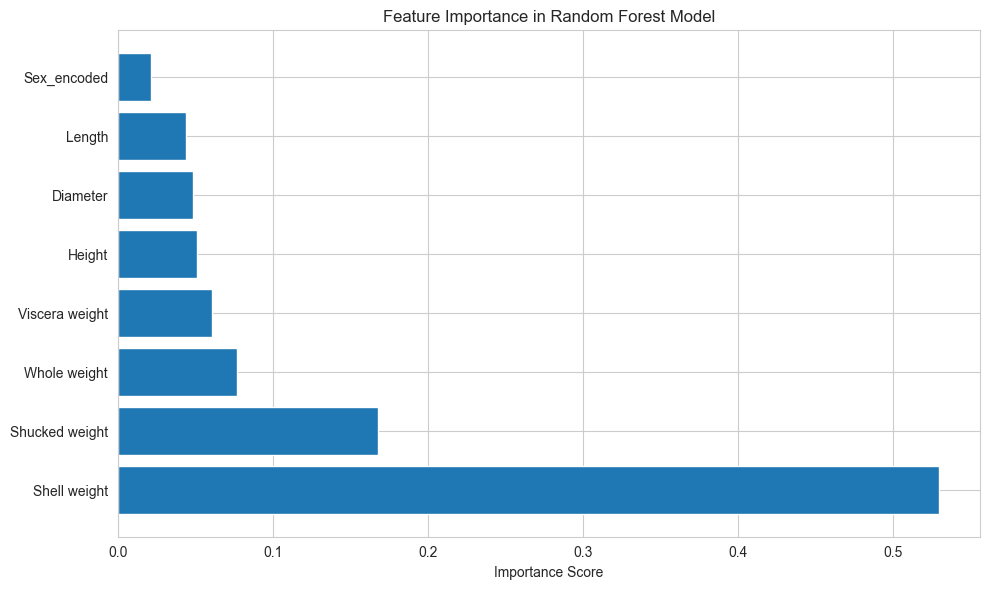

In [21]:
# Feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_rf)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()


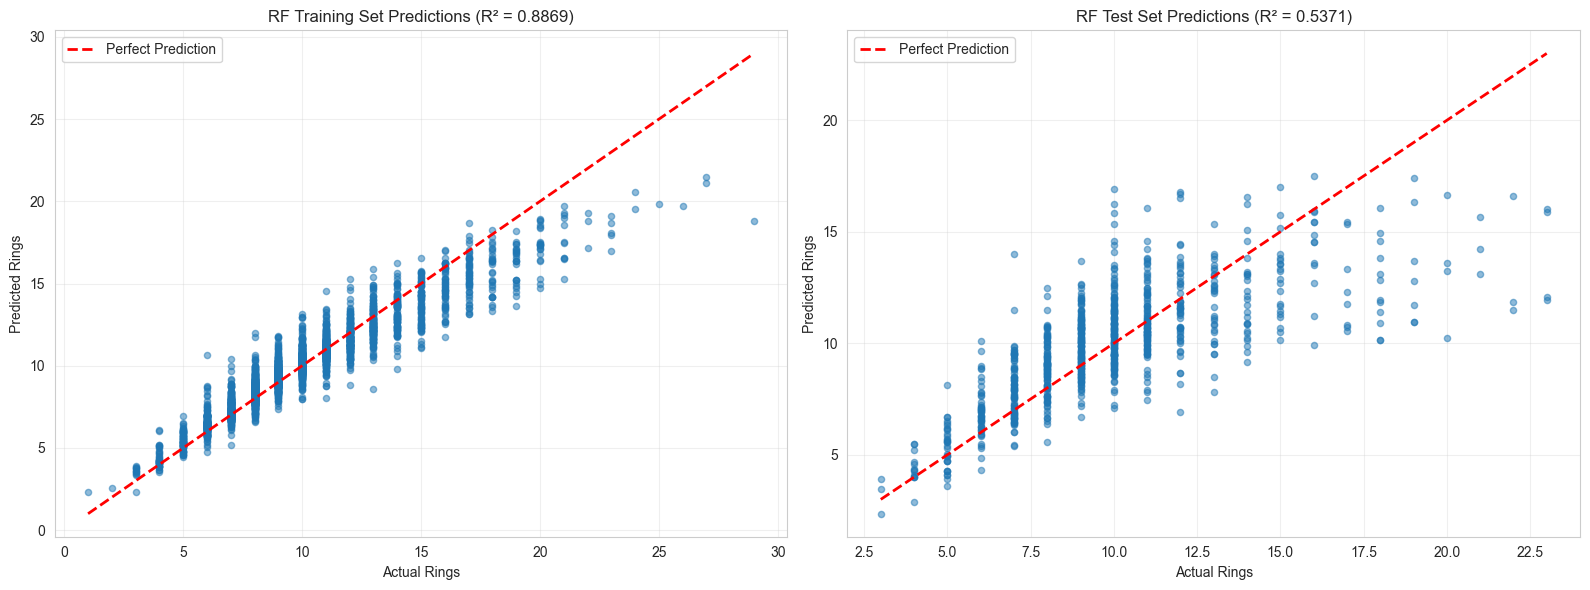

In [22]:
# Prediction vs Actual plots for Random Forest
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred_rf, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Rings')
axes[0].set_ylabel('Predicted Rings')
axes[0].set_title(f'RF Training Set Predictions (R² = {train_r2_rf:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Rings')
axes[1].set_ylabel('Predicted Rings')
axes[1].set_title(f'RF Test Set Predictions (R² = {test_r2_rf:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


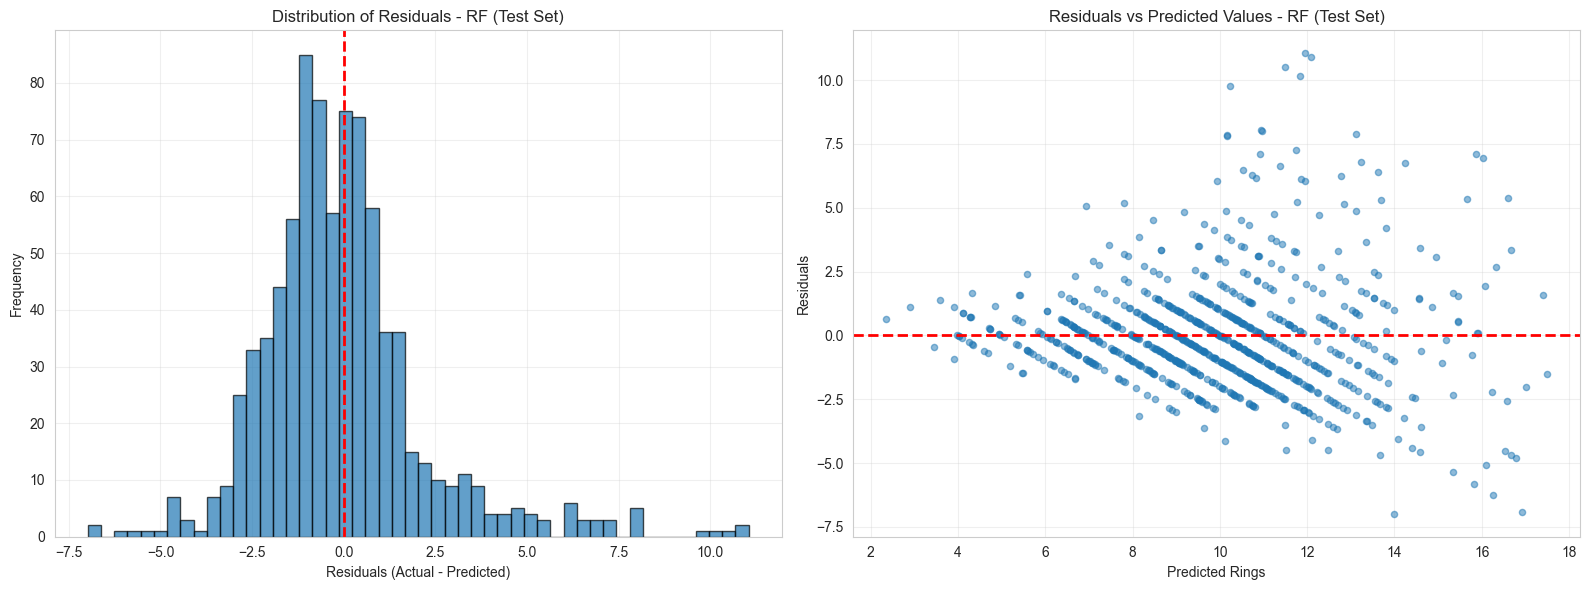

In [23]:
# Residual analysis for Random Forest
residuals_train_rf = y_train - y_train_pred_rf
residuals_test_rf = y_test - y_test_pred_rf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuals distribution
axes[0].hist(residuals_test_rf, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals - RF (Test Set)')
axes[0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[1].scatter(y_test_pred_rf, residuals_test_rf, alpha=0.5, s=20)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Rings')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values - RF (Test Set)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Model Comparison


In [24]:
# Compare model performance
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train RMSE': [train_rmse, train_rmse_rf],
    'Test RMSE': [test_rmse, test_rmse_rf],
    'Train MAE': [train_mae, train_mae_rf],
    'Test MAE': [test_mae, test_mae_rf],
    'Train R²': [train_r2, train_r2_rf],
    'Test R²': [test_r2, test_r2_rf]
})

print("Model Performance Comparison:")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Calculate improvement
rmse_improvement = ((test_rmse - test_rmse_rf) / test_rmse) * 100
r2_improvement = ((test_r2_rf - test_r2) / test_r2) * 100

print(f"\nRandom Forest vs Linear Regression:")
print(f"  RMSE improvement: {rmse_improvement:.2f}%")
print(f"  R² improvement: {r2_improvement:.2f}%")


Model Performance Comparison:
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  Test R²
Linear Regression    2.206740   2.250008   1.603677  1.630561  0.526477 0.532338
    Random Forest    1.078286   2.238611   0.734294  1.571756  0.886941 0.537064

Random Forest vs Linear Regression:
  RMSE improvement: 0.51%
  R² improvement: 0.89%


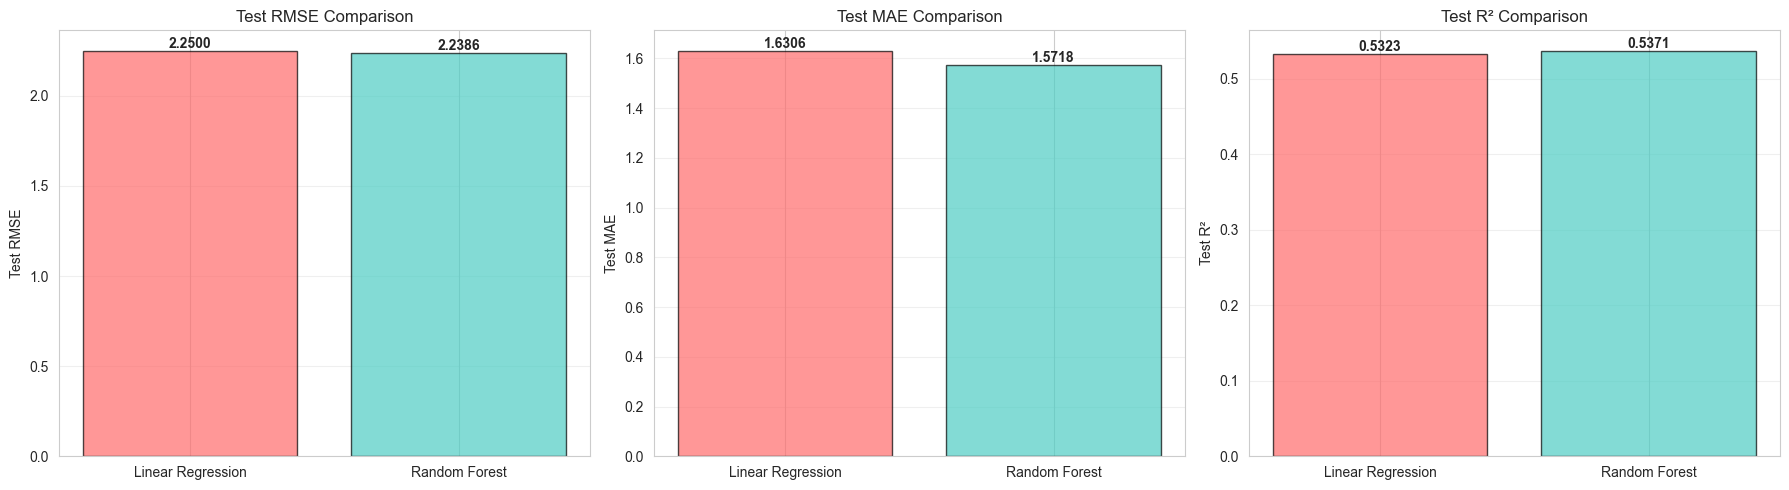

In [25]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Test RMSE', 'Test MAE', 'Test R²']
colors = ['#FF6B6B', '#4ECDC4']

for idx, metric in enumerate(metrics):
    values = comparison_df[metric].values
    bars = axes[idx].bar(comparison_df['Model'], values, color=colors, alpha=0.7, edgecolor='black')
    axes[idx].set_ylabel(metric)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{val:.4f}',
                      ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


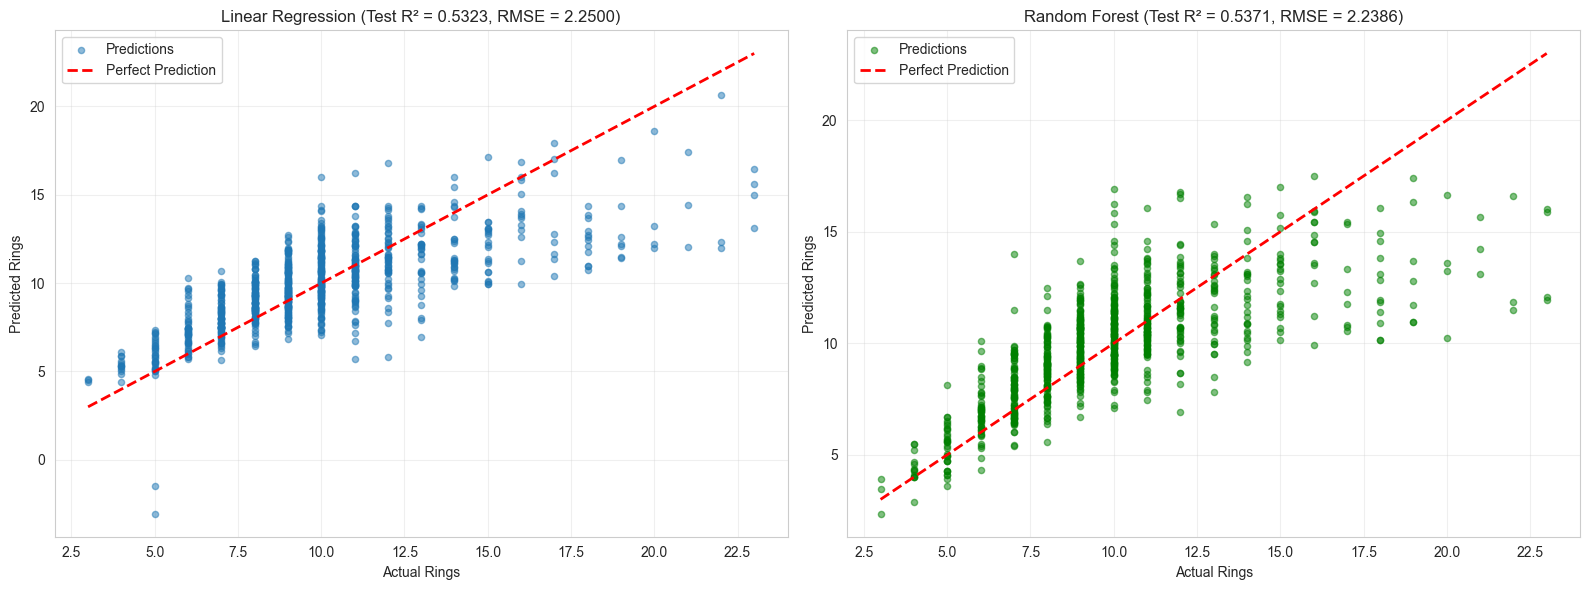

In [26]:
# Side-by-side predictions comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
axes[0].scatter(y_test, y_test_pred, alpha=0.5, s=20, label='Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Rings')
axes[0].set_ylabel('Predicted Rings')
axes[0].set_title(f'Linear Regression (Test R² = {test_r2:.4f}, RMSE = {test_rmse:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.5, s=20, label='Predictions', color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Rings')
axes[1].set_ylabel('Predicted Rings')
axes[1].set_title(f'Random Forest (Test R² = {test_r2_rf:.4f}, RMSE = {test_rmse_rf:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Model Interpretation and Conclusions

### Model Performance Summary:

**Linear Regression (Baseline):**
- Simple, interpretable model
- Test RMSE: 2.250 rings, Test R²: 0.532
- Train RMSE: 2.207 rings, Train R²: 0.526
- **Consistent performance** between training and test sets
- Fast training and prediction
- Good generalization with no signs of overfitting

**Random Forest:**
- More complex, ensemble model
- Test RMSE: 2.239 rings, Test R²: 0.537
- Train RMSE: 1.078 rings, Train R²: 0.887
- **Only 0.51% RMSE improvement** over Linear Regression on test set
- **Strong signs of overfitting** - much better on training data than test data
- Captures non-linear relationships but may be too complex for this problem

### Key Insights:

1. **Overfitting in Random Forest**: 
   - The Random Forest achieves RMSE of 1.08 on training data but 2.24 on test data
   - This large gap indicates the model is memorizing training patterns rather than learning generalizable relationships
   - The minimal improvement on test data (0.51%) doesn't justify the added complexity

2. **Linear Regression Performs Well**: 
   - Despite being simple, Linear Regression shows consistent performance across train/test sets
   - Similar RMSE on both sets (2.21 vs 2.25) indicates good generalization
   - The relationship between physical measurements and age may be largely linear

3. **Feature Importance**: 
   - Both models indicate that physical measurements (especially Shell weight, Whole weight, and Diameter) are strong predictors
   - Linear Regression provides interpretable coefficients
   - Random Forest feature importance confirms similar patterns

4. **Minimal Performance Difference**:
   - On the test set, Random Forest only marginally outperforms Linear Regression
   - RMSE: 2.239 vs 2.250 (0.51% improvement)
   - R²: 0.537 vs 0.532 (0.89% improvement)

### Recommendations:

**Best Model for Production**: **Linear Regression** is recommended because:
- Similar test set performance to Random Forest
- No overfitting - generalizes well
- Much simpler and more interpretable
- Faster training and prediction
- Easier to maintain and explain to stakeholders

**Random Forest Issues**:
- Significant overfitting (Train R²: 0.887, Test R²: 0.537)
- Minimal actual improvement over baseline
- More complex without meaningful performance gain

**Next Steps for Improvement:**
1. **For Random Forest (if pursuing)**:
   - Increase `min_samples_split` and `min_samples_leaf` to reduce overfitting
   - Reduce `max_depth` (currently 20, try 10 or 15)
   - Add more regularization through hyperparameter tuning
   - Use cross-validation to find optimal parameters
   
2. **For Linear Models**:
   - Try Ridge or Lasso regression for feature selection
   - Explore polynomial features for non-linear relationships
   - Check for and handle multicollinearity
   
3. **General Improvements**:
   - Feature engineering (ratios like shell_weight/whole_weight)
   - Handle outliers identified in EDA
   - Try other models: Gradient Boosting, XGBoost (with proper regularization)
   - Implement k-fold cross-validation for more robust evaluation

### Final Takeaway:
Sometimes simpler is better! The Linear Regression model provides a good balance of performance, interpretability, and generalization. The Random Forest's complexity doesn't translate to better predictions on unseen data, making it less suitable for this problem in its current configuration.
